In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gc
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten

import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [2]:
gc.enable()

In [3]:
data = pd.read_excel("2017_PM10_1g.xlsx") # load

In [4]:
data.head(10)                             # look

,Nr,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,Kod stacji,DsBoleslaMOB,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsKudowaMOB,DsLegAlRzecz,DsNowRudSreb,DsWalbrzWyso,...,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,...,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Kod stanowiska,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,...,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
5,2017-01-01 01:00:00,NaN,"53,3963","405,0","226,603","289,173",NaN,"80,1625","446,146","467,889",...,"23,4837","61,8409","18,53","62,105","33,2655","47,02","24,221","60,0293","20,2558","24,1928"
6,2017-01-01 02:00:00,NaN,"52,9082","310,984","229,432","265,72",NaN,"38,6769","473,629","144,374",...,"44,2607","117,002","20,0714","114,091","46,4343","62,9012","24,9919","50,9891","17,4999","83,2406"
7,2017-01-01 03:00:00,NaN,"51,3831","455,381","253,827","243,228",NaN,"47,0206","336,169","61,1247",...,"40,7959","32,0493","21,63","19,2682","29,8119","65,17","15,8157","34,6693","8,88873","39,7984"
8,2017-01-01 04:00:00,NaN,"44,6262","290,6","225,692","258,756",NaN,"31,2669","285,767","65,8004",...,"19,5365","31,6062","23,7979","13,1749","30,7476","65,17","9,87341","28,0312","7,46767","30,2386"
9,2017-01-01 05:00:00,NaN,"41,5999","263,553","254,761","242,493",NaN,"53,598","270,204","59,9626",...,"23,4659","26,8417","25,99","14,5591","31,2552","58,6162","13,6186","28,9273","8,14248","28,8418"


In [5]:
data.info(verbose=1,null_counts=True)   # they are not stored as nunmeric data (also found the most filled column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Data columns (total 124 columns):
Nr     8765 non-null object
1      8031 non-null object
2      8296 non-null object
3      8470 non-null object
4      8489 non-null object
5      8390 non-null object
6      8171 non-null object
7      8384 non-null object
8      8227 non-null object
9      8346 non-null object
10     8394 non-null object
11     8370 non-null object
12     7474 non-null object
13     8484 non-null object
14     8312 non-null object
15     8644 non-null object
16     7973 non-null object
17     8223 non-null object
18     8253 non-null object
19     8008 non-null object
20     5524 non-null object
21     8702 non-null object
22     8100 non-null object
23     8433 non-null object
24     8182 non-null object
25     8615 non-null object
26     8553 non-null object
27     7727 non-null object
28     8641 non-null object
29     8518 non-null object
30     7844 non-null object
31     8420 non-null obj

In [6]:
# I picked a column with no empty values
MpTarRoSitko_data = data.iloc[5:,50]

In [7]:
MpTarRoSitko_data[0:10]   # they used "," instead of "."

5     286,547
6     277,584
7     294,011
8     234,649
9     196,482
10    146,776
11    96,6628
12    90,6583
13    77,7428
14    66,1733
Name: 50, dtype: object

In [8]:
replaced = MpTarRoSitko_data.str.replace(",",".")   # replaced with dot

In [9]:
replaced[0:10]

5     286.547
6     277.584
7     294.011
8     234.649
9     196.482
10    146.776
11    96.6628
12    90.6583
13    77.7428
14    66.1733
Name: 50, dtype: object

In [10]:
numeric = pd.to_numeric(replaced)  # make them all float

In [11]:
numeric = numeric.fillna(numeric.mean())

In [12]:
numeric[0:10]

5     286.5470
6     277.5840
7     294.0110
8     234.6490
9     196.4820
10    146.7760
11     96.6628
12     90.6583
13     77.7428
14     66.1733
Name: 50, dtype: float64

In [13]:
print("Is there any null rows? : " + str(np.isnan(numeric).any()))

print("Total null value : " + str(numeric.isnull().sum()))

Is there any null rows? : False
Total null value : 0


In [14]:
numeric = numeric.values

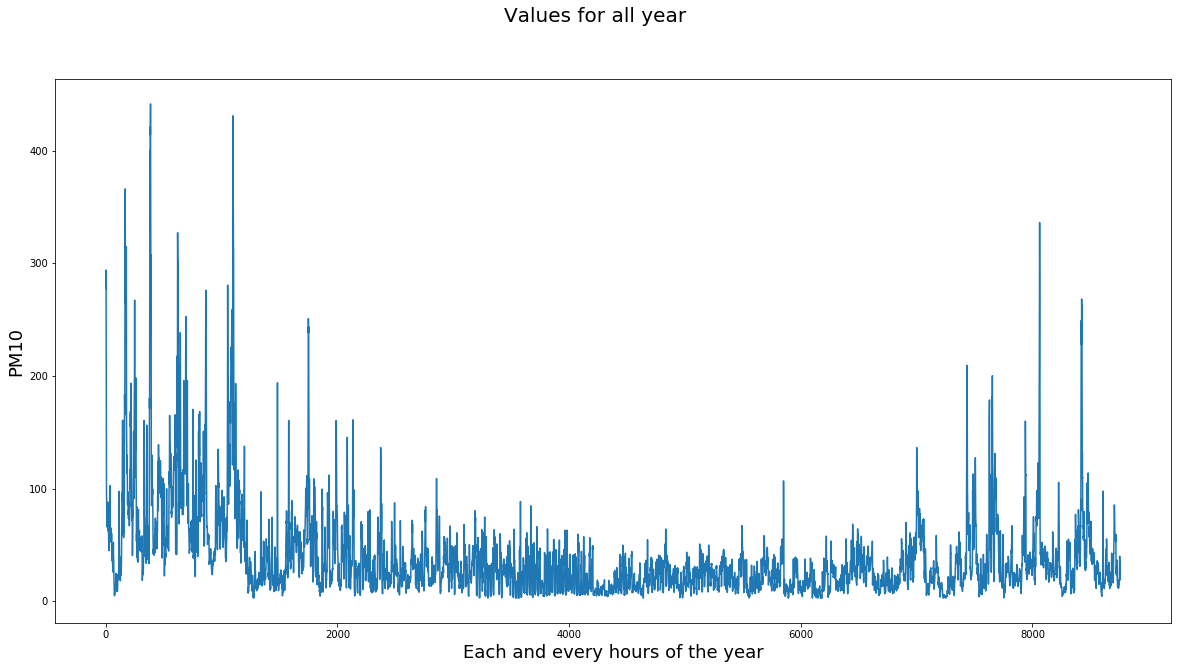

In [15]:
plt.figure(figsize=(20,10))
plt.suptitle("Values for all year",fontsize=20)
plt.plot(numeric)
plt.ylabel("PM10",fontsize=18)
plt.xlabel("Each and every hours of the year",fontsize=18)
plt.show()

In [16]:
shaped_daily = numeric.reshape(24,365)

In [17]:
shaped_daily

array([[286.547 , 277.584 , 294.011 , ...,  39.6606,  42.1222,  40.0222],
       [ 37.16  ,  38.3811,  66.74  , ...,  55.8658,  57.9459,  54.0264],
       [ 57.948 ,  62.4145,  59.1517, ..., 157.406 , 124.605 , 121.101 ],
       ...,
       [ 65.5487,  32.7042,  24.2046, ...,  30.7975,  32.9461,  38.5628],
       [ 45.9836,  62.185 ,  75.4056, ...,  56.3253,  52.5525,  43.3797],
       [ 67.02  ,  51.9517,  81.4433, ...,  23.7506,  20.3283,  19.4261]])

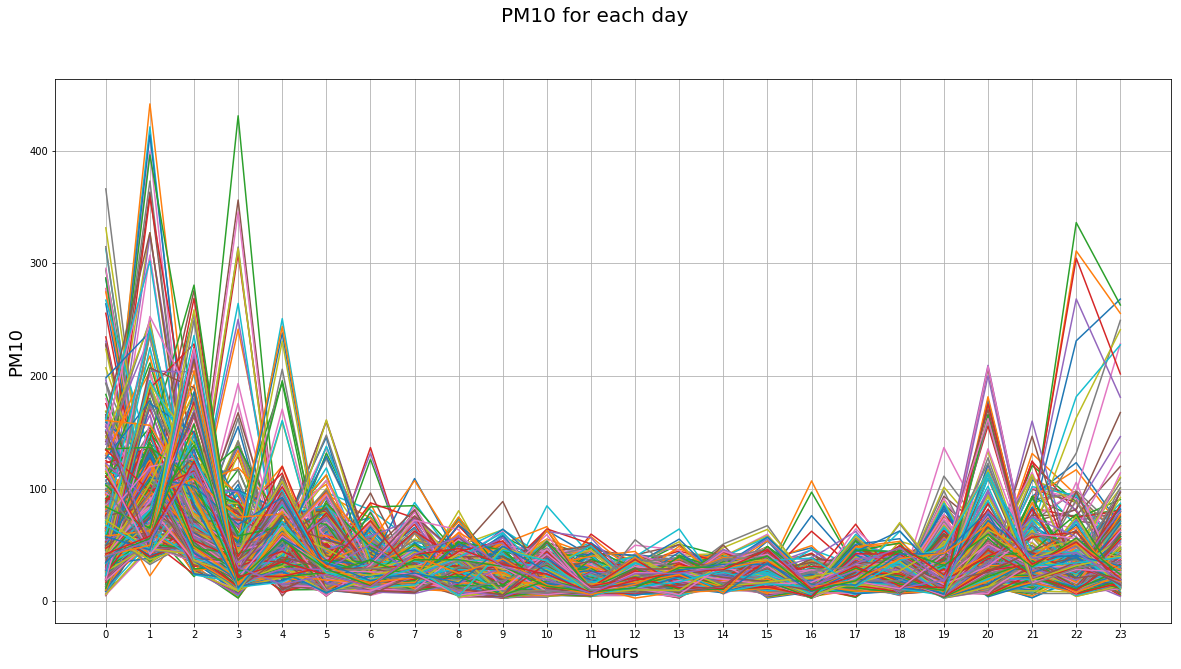

In [18]:
plt.figure(figsize=(20,10))
plt.suptitle("PM10 for each day",fontsize=20)
plt.plot(shaped_daily[:])
plt.xticks(ticks=(range(24)))
plt.xlabel("Hours",fontsize=18)
plt.ylabel("PM10",fontsize=18)
plt.grid()
plt.show()

In [19]:
daily_avg = []
for i in range(365):
    append_me = np.average(shaped_daily[:,i])
    daily_avg.append(append_me)
    
daily_avg = np.float64(daily_avg)

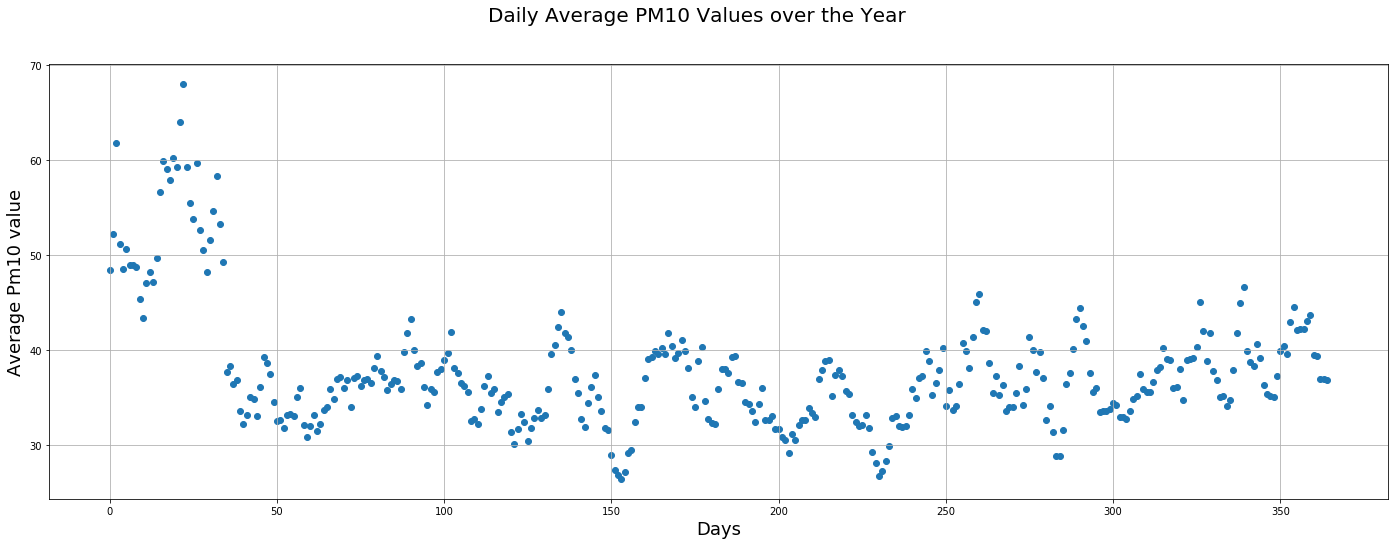

In [20]:
plt.figure(figsize=(24,8))
plt.suptitle("Daily Average PM10 Values over the Year", fontsize=20)
plt.scatter(range(365),daily_avg)
plt.grid()
plt.xlabel("Days",fontsize=18)
plt.ylabel("Average Pm10 value",fontsize=18)
plt.show()

In [21]:
def get_the_data(start_year=2010,end_year=2017):
    #return (start_year + "  " + end_year)
    #data = pd.read_excel("2017_PM10_1g.xlsx") # load
    
    for i in range(end_year+1-start_year):
        file_name = "" + str(start_year+i) + "_PM10_1g.xlsx"
        print(file_name)

In [22]:
frame_size = 66

In [23]:
train_x = []
train_y = []

for i in range(len(numeric)-(frame_size+1)):
    train_x.append(numeric[i:i+frame_size])
    train_y.append(numeric[i+frame_size+1])
    

In [ ]:
#train_x[4:6]

In [ ]:
#train_y[4:6]

In [ ]:
gc.collect()

28318

In [ ]:
train_x = np.float64(train_x)
train_y = np.float64(train_y)

train_x = train_x.reshape(-1,frame_size,1)
train_y = train_y.reshape(-1,1)

In [ ]:
print(train_x.shape)
print(train_y.shape)

(8693, 66, 1)
(8693, 1)


In [ ]:
np.isnan(train_x).any()

False

In [ ]:
my_model = Sequential()

my_model.add(LSTM(50,activation="tanh",return_sequences=True,input_shape=(frame_size,1)))
my_model.add(Dropout(0.15))

my_model.add(Flatten())

my_model.add(Dense(16,activation="relu"))
my_model.add(Dense(8,activation="relu"))
my_model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 66, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 66, 50)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3300)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                52816     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 63,361
Trainable params: 63,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer="adam",loss="MSE")

In [ ]:
my_model.fit(train_x,train_y,epochs=20,batch_size=100)

Instructions for updating:
Use tf.cast instead.
